<a href="https://colab.research.google.com/github/takumaosada/COVID-19-Basic-Analysis/blob/master/signate_covid19_case_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
!pip install japanize_matplotlib
!pip install category_encoders
import japanize_matplotlib
import category_encoders as ce

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


     |████████████████████████████████| 4.1MB 3.1MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.2-cp36-none-any.whl size=4120191 sha256=1ab762ad80a06fa30b13d932117654f8b1cc3283a3b3be1ab7fbef6904f8ae5e
  Stored in directory: /root/.cache/pip/wheels/9c/f9/fc/bc052ce743a03f94ccc7fda73d1d389ce98216c6ffaaf65afc
Successfully built japanize-matplotlib
     |████████████████████████████████| 81kB 2.4MB/s 


/usr/local/lib/python3.6/dist-packages/japanize_matplotlib/japanize_matplotlib.py:15: MatplotlibDeprecationWarning: 
The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.
  font_list = font_manager.createFontList(font_files)


In [0]:
#google のスプレッドシートを読み込む
import gspread
from oauth2client.client import GoogleCredentials

In [0]:
# google の認証
from google.colab import auth
auth.authenticate_user()

In [0]:
gc = gspread.authorize(GoogleCredentials.get_application_default())

In [0]:
singatecasefilelink='https://docs.google.com/spreadsheets/d/1VLSA8q2zPCbaTDXXcMsxK0HRZlFRVH7_x0rLd4Z7Jk8/edit#gid=960903158'

In [0]:
book = gc.open_by_url(singatecasefilelink)

In [0]:
casedata = book.worksheet('罹患者').get_all_values()

In [0]:
casedf=pd.DataFrame(casedata)

In [0]:
casedf.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28
0,都道府県コード,症例番号,都道府県症例番号,発症日,確定日,公表日,受診都道府県,居住都道府県,居住市区町村,年代,性別,職業,ステータス,退院済ﾌﾗｸﾞ,基礎疾患ﾌﾗｸﾞ,症状・経過,症状一覧,行動歴,濃厚接触者状況,濃厚接触場所,海外渡航歴ﾌﾗｸﾞ,ﾀﾞｲﾔﾓﾝﾄﾞﾌﾟﾘﾝｾｽ号乗船ﾌﾗｸﾞ,情報源,備考,罹患者関係_記入済ﾌﾗｸﾞ,罹患者トランザクション_記入済ﾌﾗｸﾞ,Relation1,Relation2,Transaction
1,1,1,1-1,2020/01/26,非公表,2020/01/28,北海道,外国,中華人民共和国:武漢市,40 - 49,女性,非公表,中等症,0,0,2020/01/21に来日し、2020/01/22より北海道を観光。\n2020/01/26...,咳;発熱,2020/01/21、２名で来日し東京都内の知人宅に宿泊。\n2020/01/22、３名で東...,濃厚接触者を特定し\n健康観察終了,非公表,1,0,http://www.pref.hokkaido.lg.jp/hf/kth/kak/hass...,非公表,0,1,1-3,1-5,1-1
2,1,2,1-2,2020/01/31,2020/02/14,2020/02/14,北海道,北海道,札幌市,50 - 59,男性,自営業,重症,0,0,2020/01/31 発熱、咳、倦怠感が出現。\n2020/02/03 石狩振興局管内の医療...,発熱;咳;倦怠感,海外渡航歴なし。濃厚接触者は、現時点で家族、同僚等43名を特定し、健康観察実施中。,非公表,非公表,0,0,http://www.pref.hokkaido.lg.jp/hf/kth/kak/hass...,非公表,0,1,1-4,1-12,1-1
3,1,3,1-3,2020/02/08,2020/02/18,2020/02/19,北海道,北海道,札幌市,40 - 49,男性,会社員,軽症,0,非公表,2020/2/8 倦怠感、筋肉痛、関節痛が出現\n2020/2/12 発熱、咳が出現\n20...,倦怠感;関節痛・筋肉痛;発熱;咳,2020/2/1から2020/2/12までの期間、No.5の男性(2020/2/19感染判明...,札幌市公表中\nid:1-5,非公表,0,0,http://www.pref.hokkaido.lg.jp/hf/kth/kak/hass...,非公表,1,1,1-6,1-7,1-1
4,1,4,1-4,2020/02/03,2020/02/19,2020/02/19,北海道,北海道,亀田郡七飯町,60 - 69,男性,議員,軽症,0,非公表,2020/2/3 微熱、咽頭痛。\n2020/2/7 渡島総合振興局管内の医療機関Aを受診。...,発熱;咽頭痛,本人からの申告によれば、海外渡航歴は無し。\n濃厚接触者48名について保健所が健康観察を行う...,濃厚接触者を特定し健康観察終了\nid:1-12,非公表,0,0,http://www.pref.hokkaido.lg.jp/hf/kth/kak/hass...,非公表,1,1,1-9,1-24,1-1


In [0]:
casedf.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28
23302,,,,,,,,,,,,,,,,,,,,,,,,,0,0,,,
23303,,,,,,,,,,,,,,,,,,,,,,,,,0,0,,,
23304,,,,,,,,,,,,,,,,,,,,,,,,,0,0,,,
23305,,,,,,,,,,,,,,,,,,,,,,,,,0,0,,,
23306,,,,,,,,,,,,,,,,,,,,,,,,,0,0,,,


In [0]:
#データフレームを整理していく
# 1. カラム名になるはずのものが一行目にきているのを置換

In [0]:
area_dict = dict(zip(casedf.index, casedf.iloc[0]))
renamed_df = casedf.rename(columns=area_dict)
df = renamed_df.drop(0)

In [0]:
df.describe()

,都道府県コード,症例番号,都道府県症例番号,発症日,確定日,公表日,受診都道府県,居住都道府県,居住市区町村,年代,性別,職業,ステータス,退院済ﾌﾗｸﾞ,基礎疾患ﾌﾗｸﾞ,症状・経過,症状一覧,行動歴,濃厚接触者状況,濃厚接触場所,海外渡航歴ﾌﾗｸﾞ,ﾀﾞｲﾔﾓﾝﾄﾞﾌﾟﾘﾝｾｽ号乗船ﾌﾗｸﾞ,情報源,備考,罹患者関係_記入済ﾌﾗｸﾞ,罹患者トランザクション_記入済ﾌﾗｸﾞ,Relation1,Relation2,Transaction
count,23306,23306,23306,23306,23306,23306,23306,23306,23306,23306,23306,23306,23306,23306,23306,23306,23306,23306,23306,23306,23306,23306,23306,23306,23306,23306,23306,23306,23306
unique,51,5175,16158,218,176,178,51,73,791,12,6,121,8,6,6,5995,1812,2907,3984,226,9,4,3232,1336,2,2,1792,3141,229
top,,,,,,,,,,,男性,,,,,,,,,,,,,,0,0,,,
freq,7146,7146,7146,9109,11929,7329,7148,8478,11783,7303,8682,13686,16557,15981,19073,15324,17959,17119,15548,19873,17270,18030,11236,20105,19019,23079,19513,19514,21035


In [0]:
df.head()

,都道府県コード,症例番号,都道府県症例番号,発症日,確定日,公表日,受診都道府県,居住都道府県,居住市区町村,年代,性別,職業,ステータス,退院済ﾌﾗｸﾞ,基礎疾患ﾌﾗｸﾞ,症状・経過,症状一覧,行動歴,濃厚接触者状況,濃厚接触場所,海外渡航歴ﾌﾗｸﾞ,ﾀﾞｲﾔﾓﾝﾄﾞﾌﾟﾘﾝｾｽ号乗船ﾌﾗｸﾞ,情報源,備考,罹患者関係_記入済ﾌﾗｸﾞ,罹患者トランザクション_記入済ﾌﾗｸﾞ,Relation1,Relation2,Transaction
1,1,1,1-1,2020/01/26,非公表,2020/01/28,北海道,外国,中華人民共和国:武漢市,40 - 49,女性,非公表,中等症,0,0,2020/01/21に来日し、2020/01/22より北海道を観光。\n2020/01/26...,咳;発熱,2020/01/21、２名で来日し東京都内の知人宅に宿泊。\n2020/01/22、３名で東...,濃厚接触者を特定し\n健康観察終了,非公表,1,0,http://www.pref.hokkaido.lg.jp/hf/kth/kak/hass...,非公表,0,1,1-3,1-5,1-1
2,1,2,1-2,2020/01/31,2020/02/14,2020/02/14,北海道,北海道,札幌市,50 - 59,男性,自営業,重症,0,0,2020/01/31 発熱、咳、倦怠感が出現。\n2020/02/03 石狩振興局管内の医療...,発熱;咳;倦怠感,海外渡航歴なし。濃厚接触者は、現時点で家族、同僚等43名を特定し、健康観察実施中。,非公表,非公表,0,0,http://www.pref.hokkaido.lg.jp/hf/kth/kak/hass...,非公表,0,1,1-4,1-12,1-1
3,1,3,1-3,2020/02/08,2020/02/18,2020/02/19,北海道,北海道,札幌市,40 - 49,男性,会社員,軽症,0,非公表,2020/2/8 倦怠感、筋肉痛、関節痛が出現\n2020/2/12 発熱、咳が出現\n20...,倦怠感;関節痛・筋肉痛;発熱;咳,2020/2/1から2020/2/12までの期間、No.5の男性(2020/2/19感染判明...,札幌市公表中\nid:1-5,非公表,0,0,http://www.pref.hokkaido.lg.jp/hf/kth/kak/hass...,非公表,1,1,1-6,1-7,1-1
4,1,4,1-4,2020/02/03,2020/02/19,2020/02/19,北海道,北海道,亀田郡七飯町,60 - 69,男性,議員,軽症,0,非公表,2020/2/3 微熱、咽頭痛。\n2020/2/7 渡島総合振興局管内の医療機関Aを受診。...,発熱;咽頭痛,本人からの申告によれば、海外渡航歴は無し。\n濃厚接触者48名について保健所が健康観察を行う...,濃厚接触者を特定し健康観察終了\nid:1-12,非公表,0,0,http://www.pref.hokkaido.lg.jp/hf/kth/kak/hass...,非公表,1,1,1-9,1-24,1-1
5,1,5,1-5,2020/02/15,2020/02/19,2020/02/20,北海道,北海道,札幌市,40 - 49,男性,会社員,軽症,0,非公表,2020/2/15 悪寒、発汗、倦怠感、筋肉痛、関節痛が出現。\n2020/2/18 発熱、...,悪寒;倦怠感;関節痛・筋肉痛,2020/2/1から2020/2/12までの期間、id:1-3の男性(2020/2/18感染...,札幌市公表中\nid:1-3,非公表,0,0,http://www.pref.hokkaido.lg.jp/hf/kth/kak/hass...,非公表,1,1,1-10,1-54,1-1


In [0]:
df =df.drop_duplicates()
df.drop(df.index[-1]).tail()

,都道府県コード,症例番号,都道府県症例番号,発症日,確定日,公表日,受診都道府県,居住都道府県,居住市区町村,年代,性別,職業,ステータス,退院済ﾌﾗｸﾞ,基礎疾患ﾌﾗｸﾞ,症状・経過,症状一覧,行動歴,濃厚接触者状況,濃厚接触場所,海外渡航歴ﾌﾗｸﾞ,ﾀﾞｲﾔﾓﾝﾄﾞﾌﾟﾘﾝｾｽ号乗船ﾌﾗｸﾞ,情報源,備考,罹患者関係_記入済ﾌﾗｸﾞ,罹患者トランザクション_記入済ﾌﾗｸﾞ,Relation1,Relation2,Transaction
16156,50,1,50-1,,,,中部国際空港,,,,,,,,,,,,,,,,,,0,0,,,
16157,51,27,51-27,,2020/03/27,,関西国際空港,不明,,20 - 29,男性,,無症状,0,,,,,,,,,https://www.mhlw.go.jp/stf/newpage_10539.html,,0,0,,,
16158,51,28,51-28,,2020/03/27,,関西国際空港,兵庫県,,非公表,男性,,無症状,0,,,,,,,,,https://www.mhlw.go.jp/stf/newpage_10539.html,,0,0,,,
16159,51,52,51-52,,2020/03/30,,関西国際空港,不明,,30 - 39,男性,,無症状,0,,,,,,,,,https://www.mhlw.go.jp/stf/newpage_10638.html,3/29ドイツから帰国,0,0,,,
16160,51,53,51-53,,2020/03/30,,関西国際空港,不明,,40 - 49,男性,,無症状,0,,,,,,,,,https://www.mhlw.go.jp/stf/newpage_10638.html,3/29オランダから帰国,0,0,,,


In [0]:
# nullの値があるかどうか確認
df.isnull().sum()

都道府県コード                  0
症例番号                     0
都道府県症例番号                 0
発症日                      0
確定日                      0
公表日                      0
受診都道府県                   0
居住都道府県                   0
居住市区町村                   0
年代                       0
性別                       0
職業                       0
ステータス                    0
退院済ﾌﾗｸﾞ                  0
基礎疾患ﾌﾗｸﾞ                 0
症状・経過                    0
症状一覧                     0
行動歴                      0
濃厚接触者状況                  0
濃厚接触場所                   0
海外渡航歴ﾌﾗｸﾞ                0
ﾀﾞｲﾔﾓﾝﾄﾞﾌﾟﾘﾝｾｽ号乗船ﾌﾗｸﾞ    0
情報源                      0
備考                       0
罹患者関係_記入済ﾌﾗｸﾞ            0
罹患者トランザクション_記入済ﾌﾗｸﾞ      0
Relation1                0
Relation2                0
Transaction              0
dtype: int64

In [0]:
# naの値があるかどうか確認
df.isna().sum()

都道府県コード                  0
症例番号                     0
都道府県症例番号                 0
発症日                      0
確定日                      0
公表日                      0
受診都道府県                   0
居住都道府県                   0
居住市区町村                   0
年代                       0
性別                       0
職業                       0
ステータス                    0
退院済ﾌﾗｸﾞ                  0
基礎疾患ﾌﾗｸﾞ                 0
症状・経過                    0
症状一覧                     0
行動歴                      0
濃厚接触者状況                  0
濃厚接触場所                   0
海外渡航歴ﾌﾗｸﾞ                0
ﾀﾞｲﾔﾓﾝﾄﾞﾌﾟﾘﾝｾｽ号乗船ﾌﾗｸﾞ    0
情報源                      0
備考                       0
罹患者関係_記入済ﾌﾗｸﾞ            0
罹患者トランザクション_記入済ﾌﾗｸﾞ      0
Relation1                0
Relation2                0
Transaction              0
dtype: int64

In [0]:
#性別でのデータクリーニングを行う
df = df[(df['性別'] == "男性") | (df['性別'] == '女性')]
#年代でのデータクリーニングを行う
df = df[(df['年代'] != "51 - 59") & (df['年代'] != '非公表') & (df['年代'] != '')]
#海外渡航歴でのデータクリーニングを行う
df["海外渡航歴ﾌﾗｸﾞ"] = df["海外渡航歴ﾌﾗｸﾞ"].str.replace("非公表", "").str.replace("１", "1").str.replace("０", "0").str.replace("他自治体で調査中", "").str.replace("千葉県で調査中", "").str.replace("不明", "")
#ﾀﾞｲﾔﾓﾝﾄﾞﾌﾟﾘﾝｾｽ号乗船ﾌﾗｸﾞでのデータクリーニングを行う
df["ﾀﾞｲﾔﾓﾝﾄﾞﾌﾟﾘﾝｾｽ号乗船ﾌﾗｸﾞ"] = df["ﾀﾞｲﾔﾓﾝﾄﾞﾌﾟﾘﾝｾｽ号乗船ﾌﾗｸﾞ"].str.replace("非公表", "").str.replace("１", "1")

In [0]:
for column_name, item in df.iteritems():
    print(column_name, type(column_name))
    print(df[column_name].value_counts())
    print('========================\n')

都道府県コード <class 'str'>
13    5143
27    1778
14    1282
11     998
1      982
12     753
28     698
40     665
23     508
26     351
17     293
16     212
8      168
21     151
10     149
34     147
47     142
18     122
4       88
15      82
25      82
7       81
38      79
39      74
29      74
6       66
9       55
30      54
20      53
44      49
22      49
19      48
43      47
41      45
24      45
37      28
2       27
32      24
35      21
49      19
42      17
45      16
5       16
33      14
48       8
46       6
36       5
51       3
31       3
Name: 都道府県コード, dtype: int64

症例番号 <class 'str'>
1       46
2       45
5       44
3       44
4       44
        ..
4433     1
3186     1
1842     1
1996     1
4933     1
Name: 症例番号, Length: 5159, dtype: int64

都道府県症例番号 <class 'str'>
12-621    2
21-150    2
44-40     2
27-557    1
12-218    1
         ..
1-989     1
47-127    1
27-437    1
2-16      1
28-324    1
Name: 都道府県症例番号, Length: 15817, dtype: int64

発症日 <class 'str'>
非公表         

In [0]:
#性別をencodeする
import category_encoders as ce
df_gender = df['性別']
list_cols = ['性別']
ce_ohe = ce.OrdinalEncoder(cols=list_cols,handle_unknown='impute')
df['性別'] = ce_ohe.fit_transform(df_gender)

In [0]:
#受診都道府県をencodeする
df_city = df['受診都道府県']
list_cols = ['受診都道府県']
ce_ohe = ce.OrdinalEncoder(cols=list_cols,handle_unknown='impute')
df['受診都道府県'] = ce_ohe.fit_transform(df_city)

In [0]:
#居住都道府県をencodeする
df_city = df['居住都道府県']
list_cols = ['居住都道府県']
ce_ohe = ce.OrdinalEncoder(cols=list_cols,handle_unknown='impute')
df['居住都道府県'] = ce_ohe.fit_transform(df_city)

In [0]:
#年代をencodeする
df_age = df['年代']
list_cols = ['年代']
ce_ohe = ce.OrdinalEncoder(cols=list_cols,handle_unknown='impute')
df['年代'] = ce_ohe.fit_transform(df_age)

In [0]:
#ﾀﾞｲﾔﾓﾝﾄﾞﾌﾟﾘﾝｾｽ号乗船ﾌﾗｸﾞをencodeする
df_diamond = df['ﾀﾞｲﾔﾓﾝﾄﾞﾌﾟﾘﾝｾｽ号乗船ﾌﾗｸﾞ']
list_cols = ['ﾀﾞｲﾔﾓﾝﾄﾞﾌﾟﾘﾝｾｽ号乗船ﾌﾗｸﾞ']
ce_ohe = ce.OrdinalEncoder(cols=list_cols,handle_unknown='impute')
df['ﾀﾞｲﾔﾓﾝﾄﾞﾌﾟﾘﾝｾｽ号乗船ﾌﾗｸﾞ'] = ce_ohe.fit_transform(df_diamond)

In [0]:
df_foreign = df['海外渡航歴ﾌﾗｸﾞ']
#海外渡航歴ﾌﾗｸﾞをencodeする
list_cols = ['海外渡航歴ﾌﾗｸﾞ']
ce_ohe = ce.OrdinalEncoder(cols=list_cols,handle_unknown='impute')
df['海外渡航歴ﾌﾗｸﾞ'] = ce_ohe.fit_transform(df_foreign)

In [0]:
# sns.pairplot(df)

In [0]:
#職業とステータスの関係性
job_status_df = df[['職業', 'ステータス']]
job_status_df = job_status_df.groupby('職業').filter(lambda x: len(x) > 100)

df_status = job_status_df['ステータス']
list_cols = ['ステータス']
ce_ohe = ce.OrdinalEncoder(cols=list_cols,handle_unknown='impute')
job_status_df['ステータス'] = ce_ohe.fit_transform(df_status)

job_status_df['ステータス'] = job_status_df['ステータス'].astype(float)

In [0]:
# fig, axs = plt.subplots(15, 1, figsize=(10, 10))
# for count, (index, value) in enumerate(job_status_df['職業'].value_counts().iteritems(), 1):
#   title = str(index) + ' (標本数: ' + str(value) +  ")"
#   dataframe = job_status_df[job_status_df['職業'] == index]
#   axs[count].set_title(title)
#   axs[count].pie(dataframe["ステータス"])

# plt.show()

In [0]:
!pip install xgboost
import xgboost as xgb

In [0]:
# "ﾀﾞｲﾔﾓﾝﾄﾞﾌﾟﾘﾝｾｽ号乗船ﾌﾗｸﾞ"を取り除く
df_new = df[[
            "都道府県コード",
            "年代",
            "性別",
            "ステータス",
            "海外渡航歴ﾌﾗｸﾞ"]]

In [0]:
# ステータスは`非公開`や``をdropし、中等症以上のものは1, 中等症未満は２に変換する
df_new = df_new[(df['ステータス'] == "重症") | (df['ステータス'] == '軽症') | (df['ステータス'] == '死亡') | (df['ステータス'] == '無症状') | (df['ステータス'] == '中等症')]
df_new["ステータス"] = df_new["ステータス"].str.replace("重症", "1").str.replace("死亡", "1").str.replace("中等症", "1").str.replace("軽症", "2").str.replace("無症状", "2")
df_new["ステータス"]  =df_new["ステータス"].astype(int)

In [0]:
df_new["都道府県コード"] = df_new["都道府県コード"].astype(int)

In [0]:
df['ステータス'].value_counts()

       9207
軽症     4240
無症状     882
非公表     833
中等症     343
重症      157
死亡      155
調査中       3
Name: ステータス, dtype: int64

In [0]:
df_new.dtypes

都道府県コード      int64
年代           int64
性別           int64
ステータス        int64
海外渡航歴ﾌﾗｸﾞ    int64
dtype: object

In [0]:
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.metrics import mean_squared_error, mean_absolute_error
from IPython.display import clear_output

In [0]:
df_train, df_test = train_test_split(df_new, test_size=0.3, random_state=0)

y_train = df_train['ステータス']
y_test = df_test['ステータス']
x_train = df_train.drop(['ステータス'], axis=1)
x_test = df_test.drop(['ステータス'], axis=1)

dtrain = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_test, label=y_test)

In [0]:
df_train['ステータス'].value_counts()

2    3607
1     436
Name: ステータス, dtype: int64

In [0]:
params = {
    'n_estimators': 5000,
    'max_depth': 7,
    'objective':'reg:linear',
    'min_child_weight': 4,
    'eta': 0.07,
    'eval_metric': 'mae',
}
evals = [(dtrain, 'train'), (dtest, 'test')]

evals_result = {}

model = xgb.train(
    params,
    dtrain,
    num_boost_round=5000,
    evals=evals,
    early_stopping_rounds=30,
    evals_result=evals_result,
        )
clear_output()

In [0]:
def mean_error_rate(y_pred, y_test):
    mer = np.mean(abs(y_pred-y_true)/y_true * 100)
    return mer

y_pred = model.predict(dtest)
y_true = y_test.values

print('誤差率 : {0:.4f} %'.format(mean_error_rate(y_pred, y_test)))

誤差率 : 13.3689 %


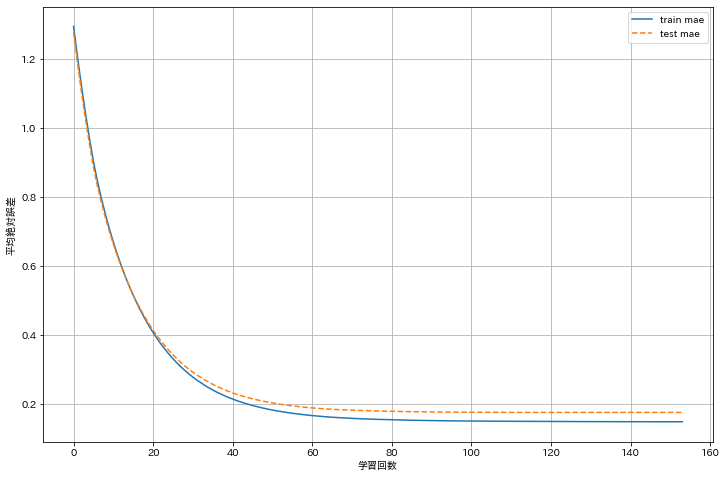

In [0]:
plt.figure(figsize=(12, 8))
train_metric = evals_result['train']['mae']
plt.plot(train_metric, label='train mae')
eval_metric = evals_result['test']['mae']
plt.plot(eval_metric, label='test mae', linestyle='dashed')
plt.grid()
plt.legend()
plt.xlabel('学習回数')
plt.ylabel('平均絶対誤差')
plt.savefig('kodate_learning_curve.png')
plt.show()

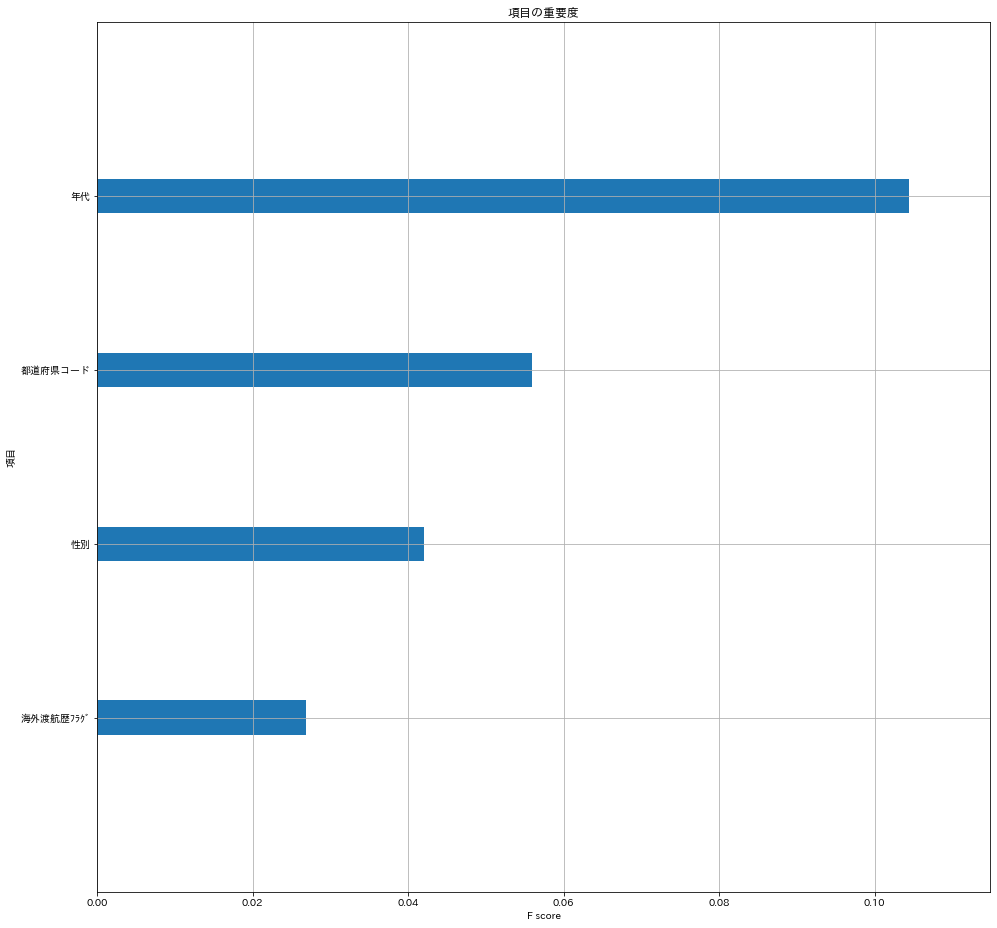

In [0]:
_, ax = plt.subplots(figsize=(16, 16))
xgb.plot_importance(model, ax=ax,  importance_type='gain', title='項目の重要度',show_values=False)
plt.ylabel("項目")
plt.savefig('kodate_feature.png')
plt.show()